To predict employee attrition using CatBoost and XgBoost

## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.




**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [ ]:
# read the dataset

df_data = pd.read_csv('./wa_fn_usec_hr_employee_attrition_tsv.csv')

In [ ]:
# Check the shape of dataframe.

df_data.shape

(1470, 35)

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

In [ ]:
# making list of all columns, categorical columns and numerical columns
lst_col = df_data.columns.tolist()
lst_cat_cols = df_data.select_dtypes(include=['object']).columns.tolist()
lst_num_cols = list(set(lst_col) - set(lst_cat_cols))

print("List of all columns: ", lst_col)
print("List of numerical columns: ", lst_num_cols)
print("List of categorical columns: ", lst_cat_cols)

List of all columns:  ['age', 'attrition', 'businesstravel', 'dailyrate', 'department', 'distancefromhome', 'education', 'educationfield', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
List of numerical columns:  ['jobinvolvement', 'dailyrate', 'worklifebalance', 'yearswithcurrmanager', 'trainingtimeslastyear', 'jobsatisfaction', 'relationshipsatisfaction', 'joblevel', 'yearsincurrentrole', 'monthlyincome', 'hourlyrate', 'stockoptionlevel', 'distancefromhome', 'monthlyrate', 'age', 'totalworkingyears', 'education', 'percentsalaryhike', 's

In [ ]:
# printing statistical description of the data
df_data.describe()

age    dailyrate  distancefromhome    education  employeecount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       employeenumber  environmentsatisfaction   hourlyrate  jobinvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          joblevel  jobsatisfaction  monthlyincome   monthlyrate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       numcompaniesworked  percentsalaryhike  performancerating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       relationshipsatisfaction  standardhours  stockoptionlevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       totalworkingyears  trainingtimeslastyear  worklifebalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       yearsatcompany  yearsincurrentrole  yearssincelastpromotion  \
count     1470.000000         1470.000000              1470.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [ ]:
summary = pd.DataFrame(df_data.dtypes, columns=['dtype'])
summary = summary.reset_index()
summary = summary.rename(columns={'index':'Name'})
summary['Null_Counts'] = df_data.isnull().sum().values
summary['Uniques'] = df_data.nunique().values
summary['Null_Percent'] = (summary['Null_Counts']*100) / len(df_data)
summary.sort_values(by='Uniques', ascending=True, inplace=True)
summary

Name   dtype  Null_Counts  Uniques  Null_Percent
21                    over18  object            0        1           0.0
26             standardhours   int64            0        1           0.0
8              employeecount   int64            0        1           0.0
11                    gender  object            0        2           0.0
1                  attrition  object            0        2           0.0
24         performancerating   int64            0        2           0.0
22                  overtime  object            0        2           0.0
17             maritalstatus  object            0        3           0.0
4                 department  object            0        3           0.0
2             businesstravel  object            0        3           0.0
27          stockoptionlevel   int64            0        4           0.0
10   environmentsatisfaction   int64            0        4           0.0
13            jobinvolvement   int64            0        4           0.0
16           jobsatisfaction   int64            0        4           0.0
25  relationshipsatisfaction   int64            0        4           0.0
30           worklifebalance   int64            0        4           0.0
6                  education   int64            0        5           0.0
14                  joblevel   int64            0        5           0.0
7             educationfield  object            0        6           0.0
29     trainingtimeslastyear   int64            0        7           0.0
15                   jobrole  object            0        9           0.0
20        numcompaniesworked   int64            0       10           0.0
23         percentsalaryhike   int64            0       15           0.0
33   yearssincelastpromotion   int64            0       16           0.0
34      yearswithcurrmanager   int64            0       18           0.0
32        yearsincurrentrole   int64            0       19           0.0
5           distancefromhome   int64            0       29           0.0
31            yearsatcompany   int64            0       37           0.0
28         totalworkingyears   int64            0       40           0.0
0                        age   int64            0       43           0.0
12                hourlyrate   int64            0       71           0.0
3                  dailyrate   int64            0      886           0.0
18             monthlyincome   int64            0     1349           0.0
19               monthlyrate   int64            0     1427           0.0
9             employeenumber   int64            0     1470           0.0

In [ ]:
# Observations:
# columns standardhours, employeecount, over18 can be dropped since they are constant
df_data.drop(columns=['standardhours', 'employeecount', 'over18'], inplace=True, axis=1)

# making list of all columns, categorical columns and numerical columns
lst_col = df_data.columns.tolist()
lst_cat_cols = df_data.select_dtypes(include=['object']).columns.tolist()
lst_num_cols = list(set(lst_col) - set(lst_cat_cols))


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeenumber            1470 non-null   int64 
 9   environmentsatisfaction   1470 non-null   int64 
 10  gender                    1470 non-null   object
 11  hourlyrate                1470 non-null   int64 
 12  jobinvolvement            1470 non-null   int64 
 13  joblevel                  1470 non-null   int64 
 14  jobrole                 

In [ ]:
# Missing values in our categorical variables
cat_cols = df_data[lst_cat_cols].isnull().mean().sort_values(ascending=False)
print(cat_cols)

# Missing values in our numerical variables
numr_cols = df_data[lst_num_cols].isnull().mean().sort_values(ascending=False)
print(numr_cols)

attrition         0.0
businesstravel    0.0
department        0.0
educationfield    0.0
gender            0.0
jobrole           0.0
maritalstatus     0.0
overtime          0.0
dtype: float64
jobinvolvement              0.0
dailyrate                   0.0
yearsatcompany              0.0
numcompaniesworked          0.0
employeenumber              0.0
environmentsatisfaction     0.0
yearssincelastpromotion     0.0
percentsalaryhike           0.0
education                   0.0
totalworkingyears           0.0
age                         0.0
monthlyrate                 0.0
distancefromhome            0.0
stockoptionlevel            0.0
hourlyrate                  0.0
monthlyincome               0.0
yearsincurrentrole          0.0
joblevel                    0.0
relationshipsatisfaction    0.0
jobsatisfaction             0.0
trainingtimeslastyear       0.0
yearswithcurrmanager        0.0
worklifebalance             0.0
performancerating           0.0
dtype: float64


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

[]

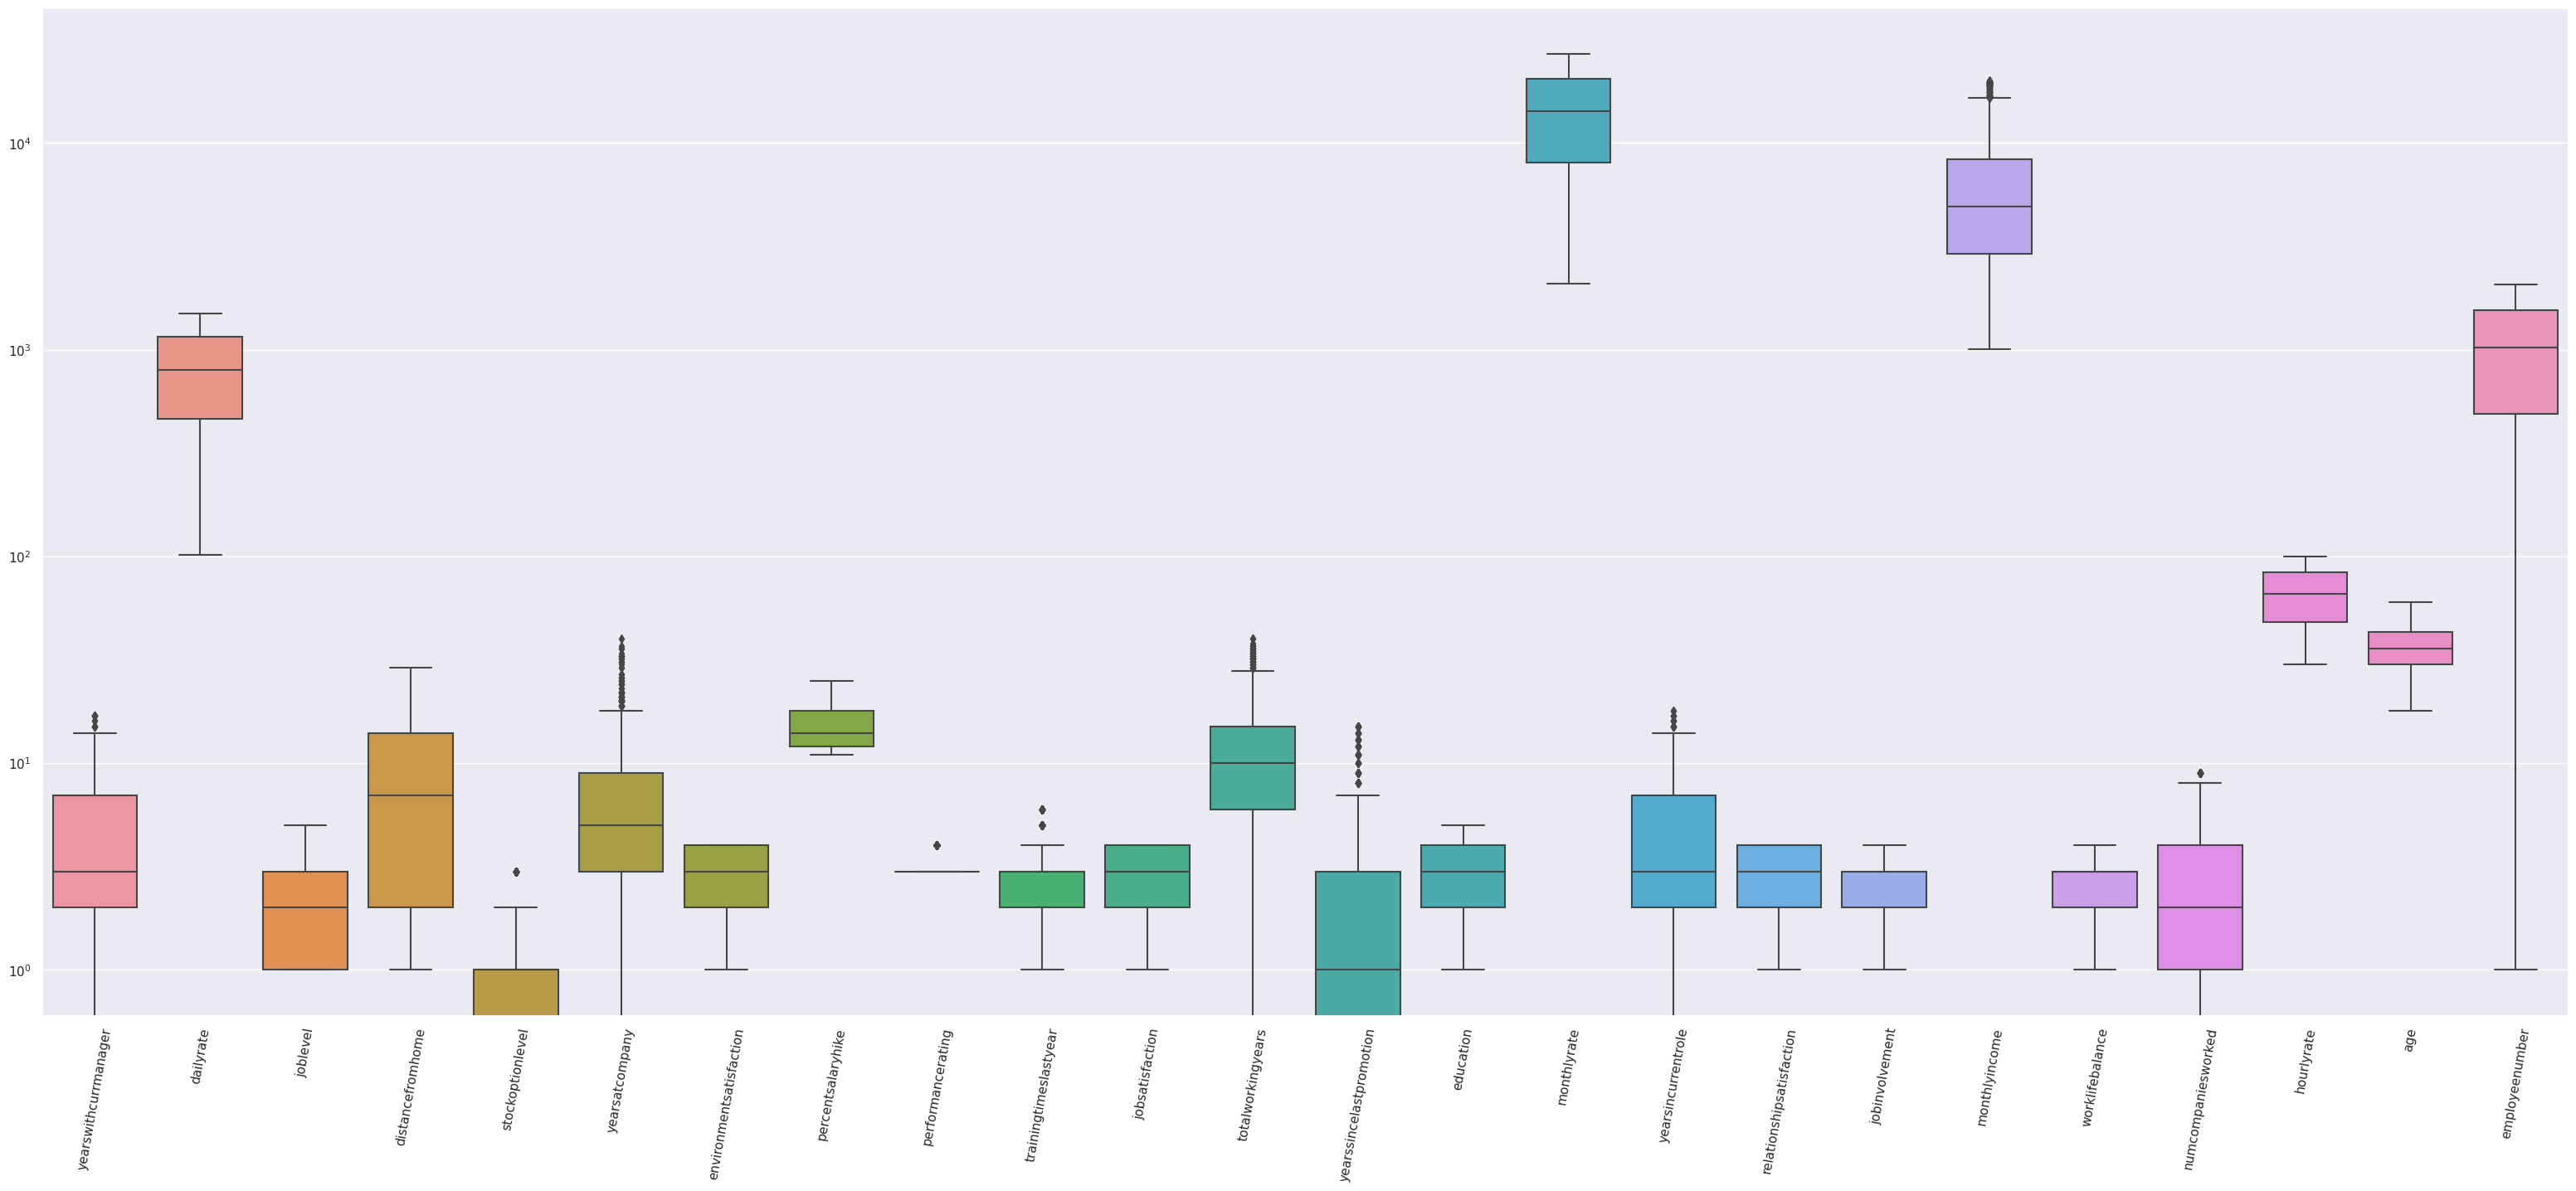

In [ ]:
# another way to plot multiple boxplots
sns.set(rc={'figure.figsize':(35,15)})
sns.boxplot(data=df_data[lst_num_cols])
plt.xticks(rotation=80)
plt.semilogy()

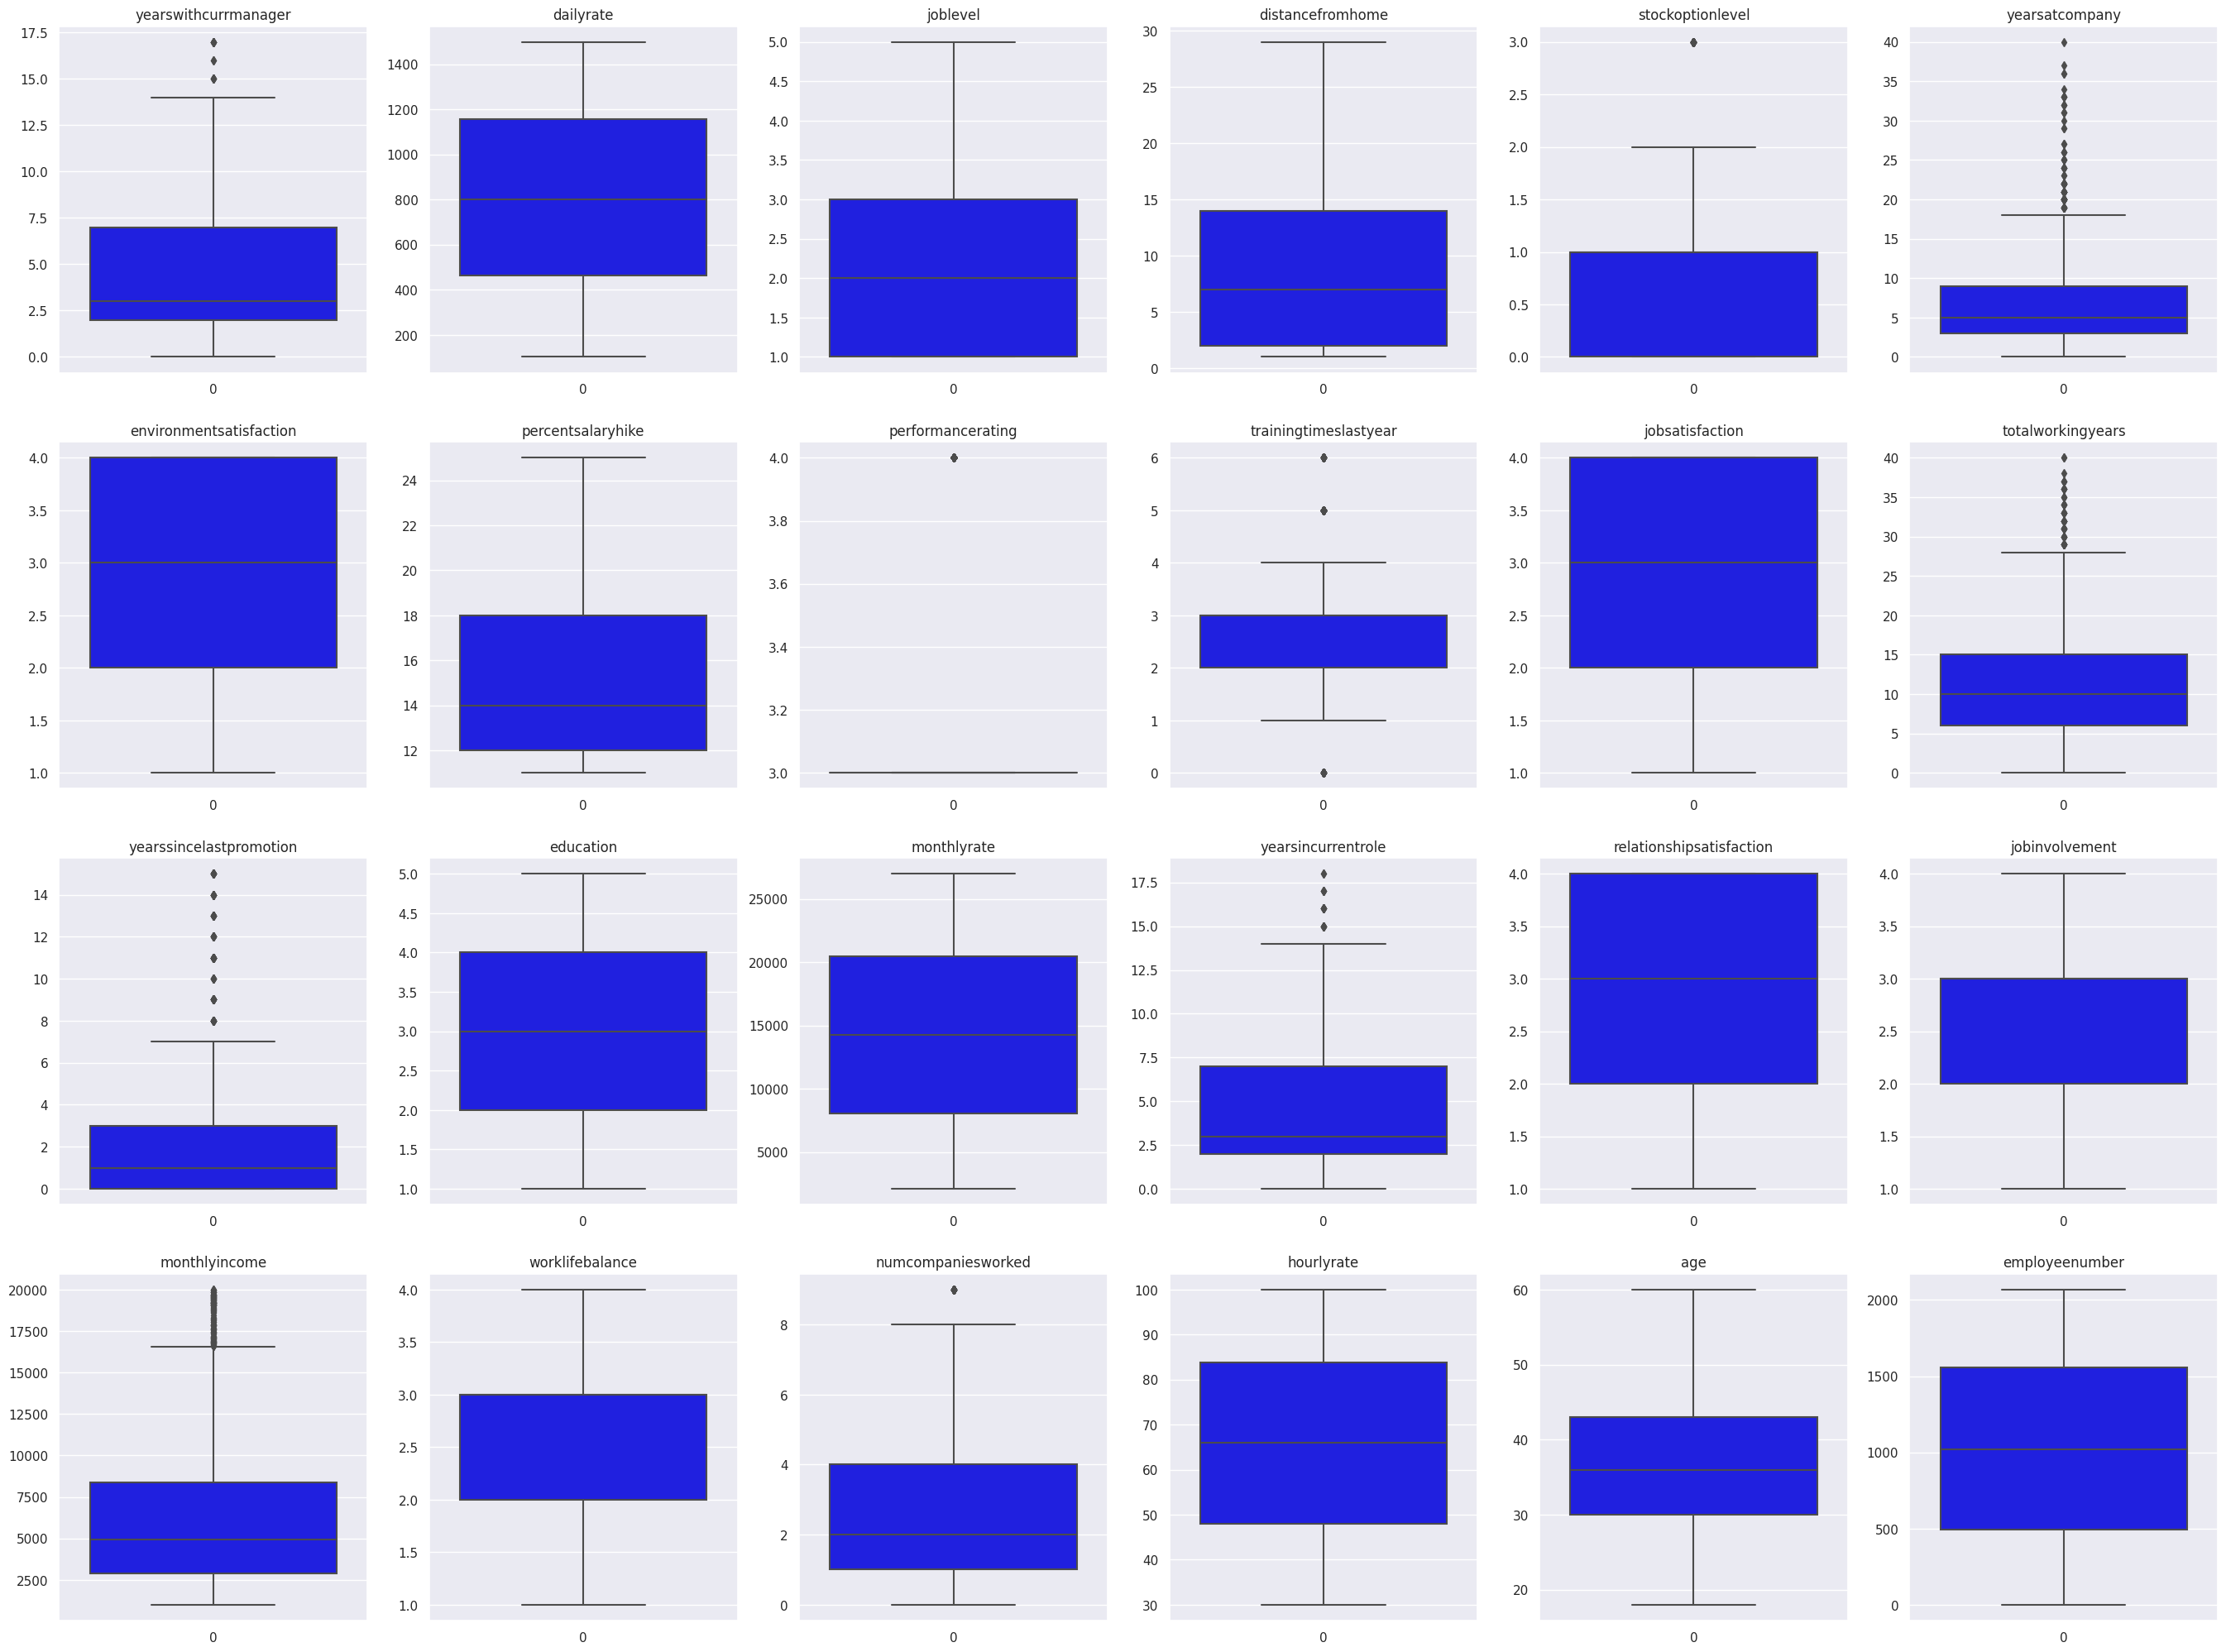

In [ ]:
k=1
plt.figure(figsize=(30,30))

for col in lst_num_cols:
    plt.subplot(5,6,k)
    sns.boxplot(df_data[col],color='blue')
    plt.title(col)
    k=k+1

### Handling outliers

In [ ]:
Q1 = df_data[lst_num_cols].quantile(0.25)
Q3 = df_data[lst_num_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_data[~((df_data[lst_num_cols] < (Q1 - 1.5 * IQR)) |(df_data[lst_num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape

(779, 32)

In [ ]:
# Recheck for outliers
df_no_outliers

age attrition     businesstravel  dailyrate              department  \
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
...   ...       ...                ...        ...                     ...   
1463   31        No         Non-Travel        325  Research & Development   
1464   26        No      Travel_Rarely       1167                   Sales   
1465   36        No  Travel_Frequently        884  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      distancefromhome  education educationfield  employeenumber  \
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
5                    2          2  Life Sciences               8   
9                   27          3        Medical              13   
11                  15          2  Life Sciences              15   
...                ...        ...            ...             ...   
1463                 5          3        Medical            2057   
1464                 5          3          Other            2060   
1465                23          2        Medical            2061   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel  \
2                           4    Male          92               2         1   
3                           4  Female          56               3         1   
5                           4    Male          79               3         1   
9                           3    Male          94               3         2   
11                          4  Female          49               2         2   
...                       ...     ...         ...             ...       ...   
1463                        2    Male          74               3         2   
1464                        4  Female          30               2         1   
1465                        3    Male          41               4         2   
1468                        4    Male          63               2         2   
1469                        2    Male          82               4         2   

                        jobrole  jobsatisfaction maritalstatus  monthlyincome  \
2         Laboratory Technician                3        Single           2090   
3            Research Scientist                3       Married           2909   
5         Laboratory Technician                4        Single           3068   
9     Healthcare Representative                3       Married           5237   
11        Laboratory Technician                3        Single           4193   
...                         ...              ...           ...            ...   
1463     Manufacturing Director                1        Single           9936   
1464       Sales Representative                3        Single           2966   
1465      Laboratory Technician                4       Married           2571   
1468            Sales Executive                2       Married           5390   
1469      Laboratory Technician                3       Married           4404   

      monthlyrate  numcompaniesworked overtime  percentsalaryhike  \
2            2396                   6      Yes                 15   
3           23159                   1      Yes                 11   
5           11864                   0       No                 13   
9           16577                   6       No                 13 

### Target label imbalance

In [ ]:
# Count of unique values in Attrition column
print(df_no_outliers['attrition'].value_counts())

No     641
Yes    138
Name: attrition, dtype: int64


Text(0, 0.5, 'Count')

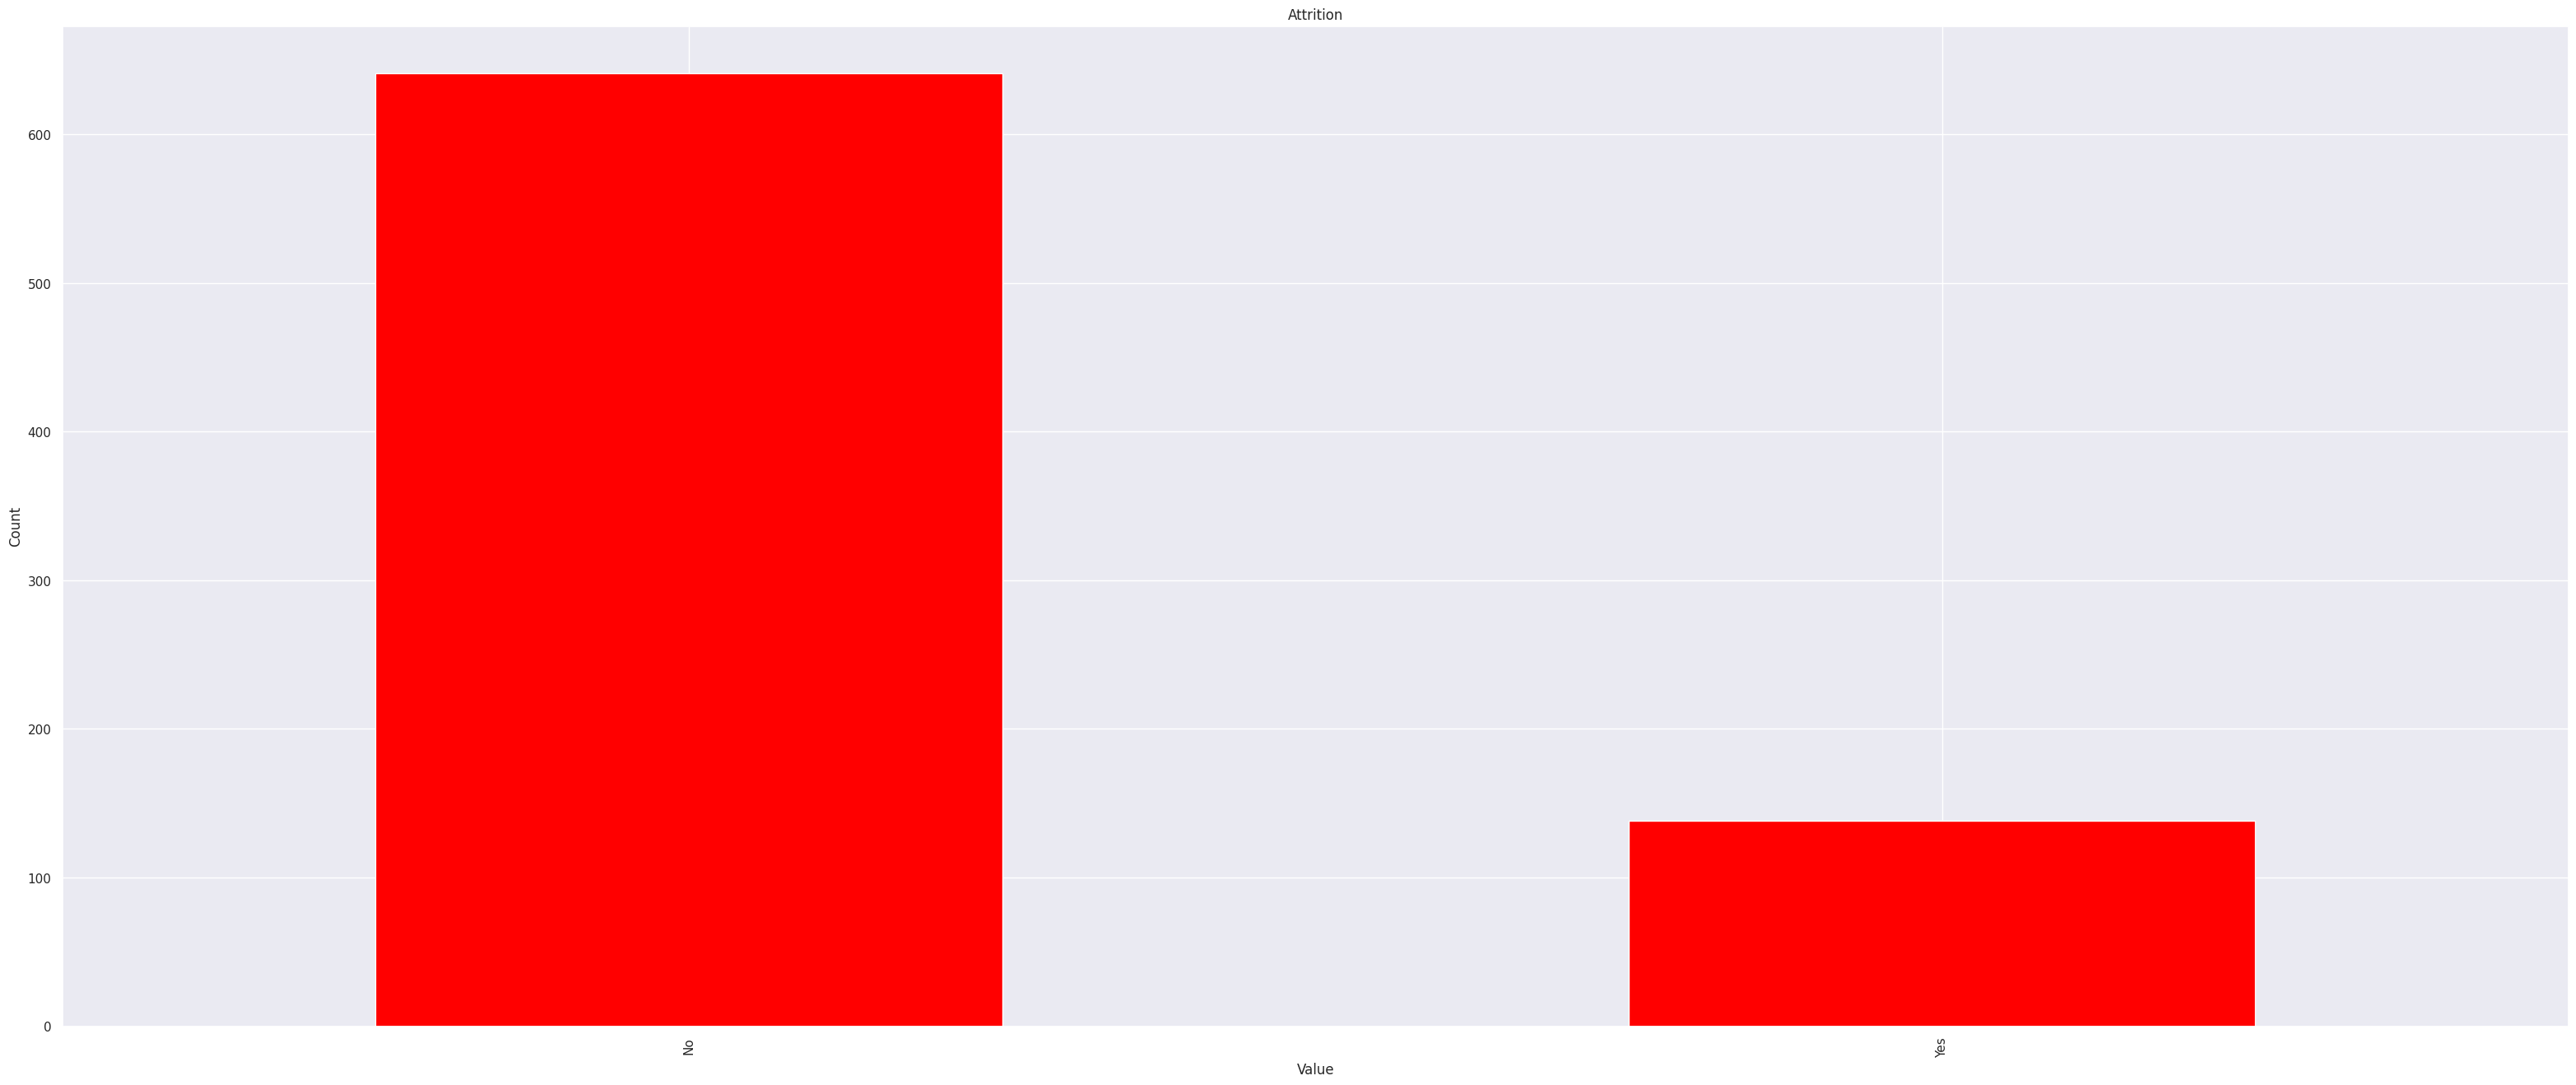

In [ ]:
# Plot barplot to visualize balance/imbalance
df_no_outliers['attrition'].value_counts().plot(kind='bar', color='red')
plt.title('Attrition')
plt.xlabel('Value')
plt.ylabel('Count')

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

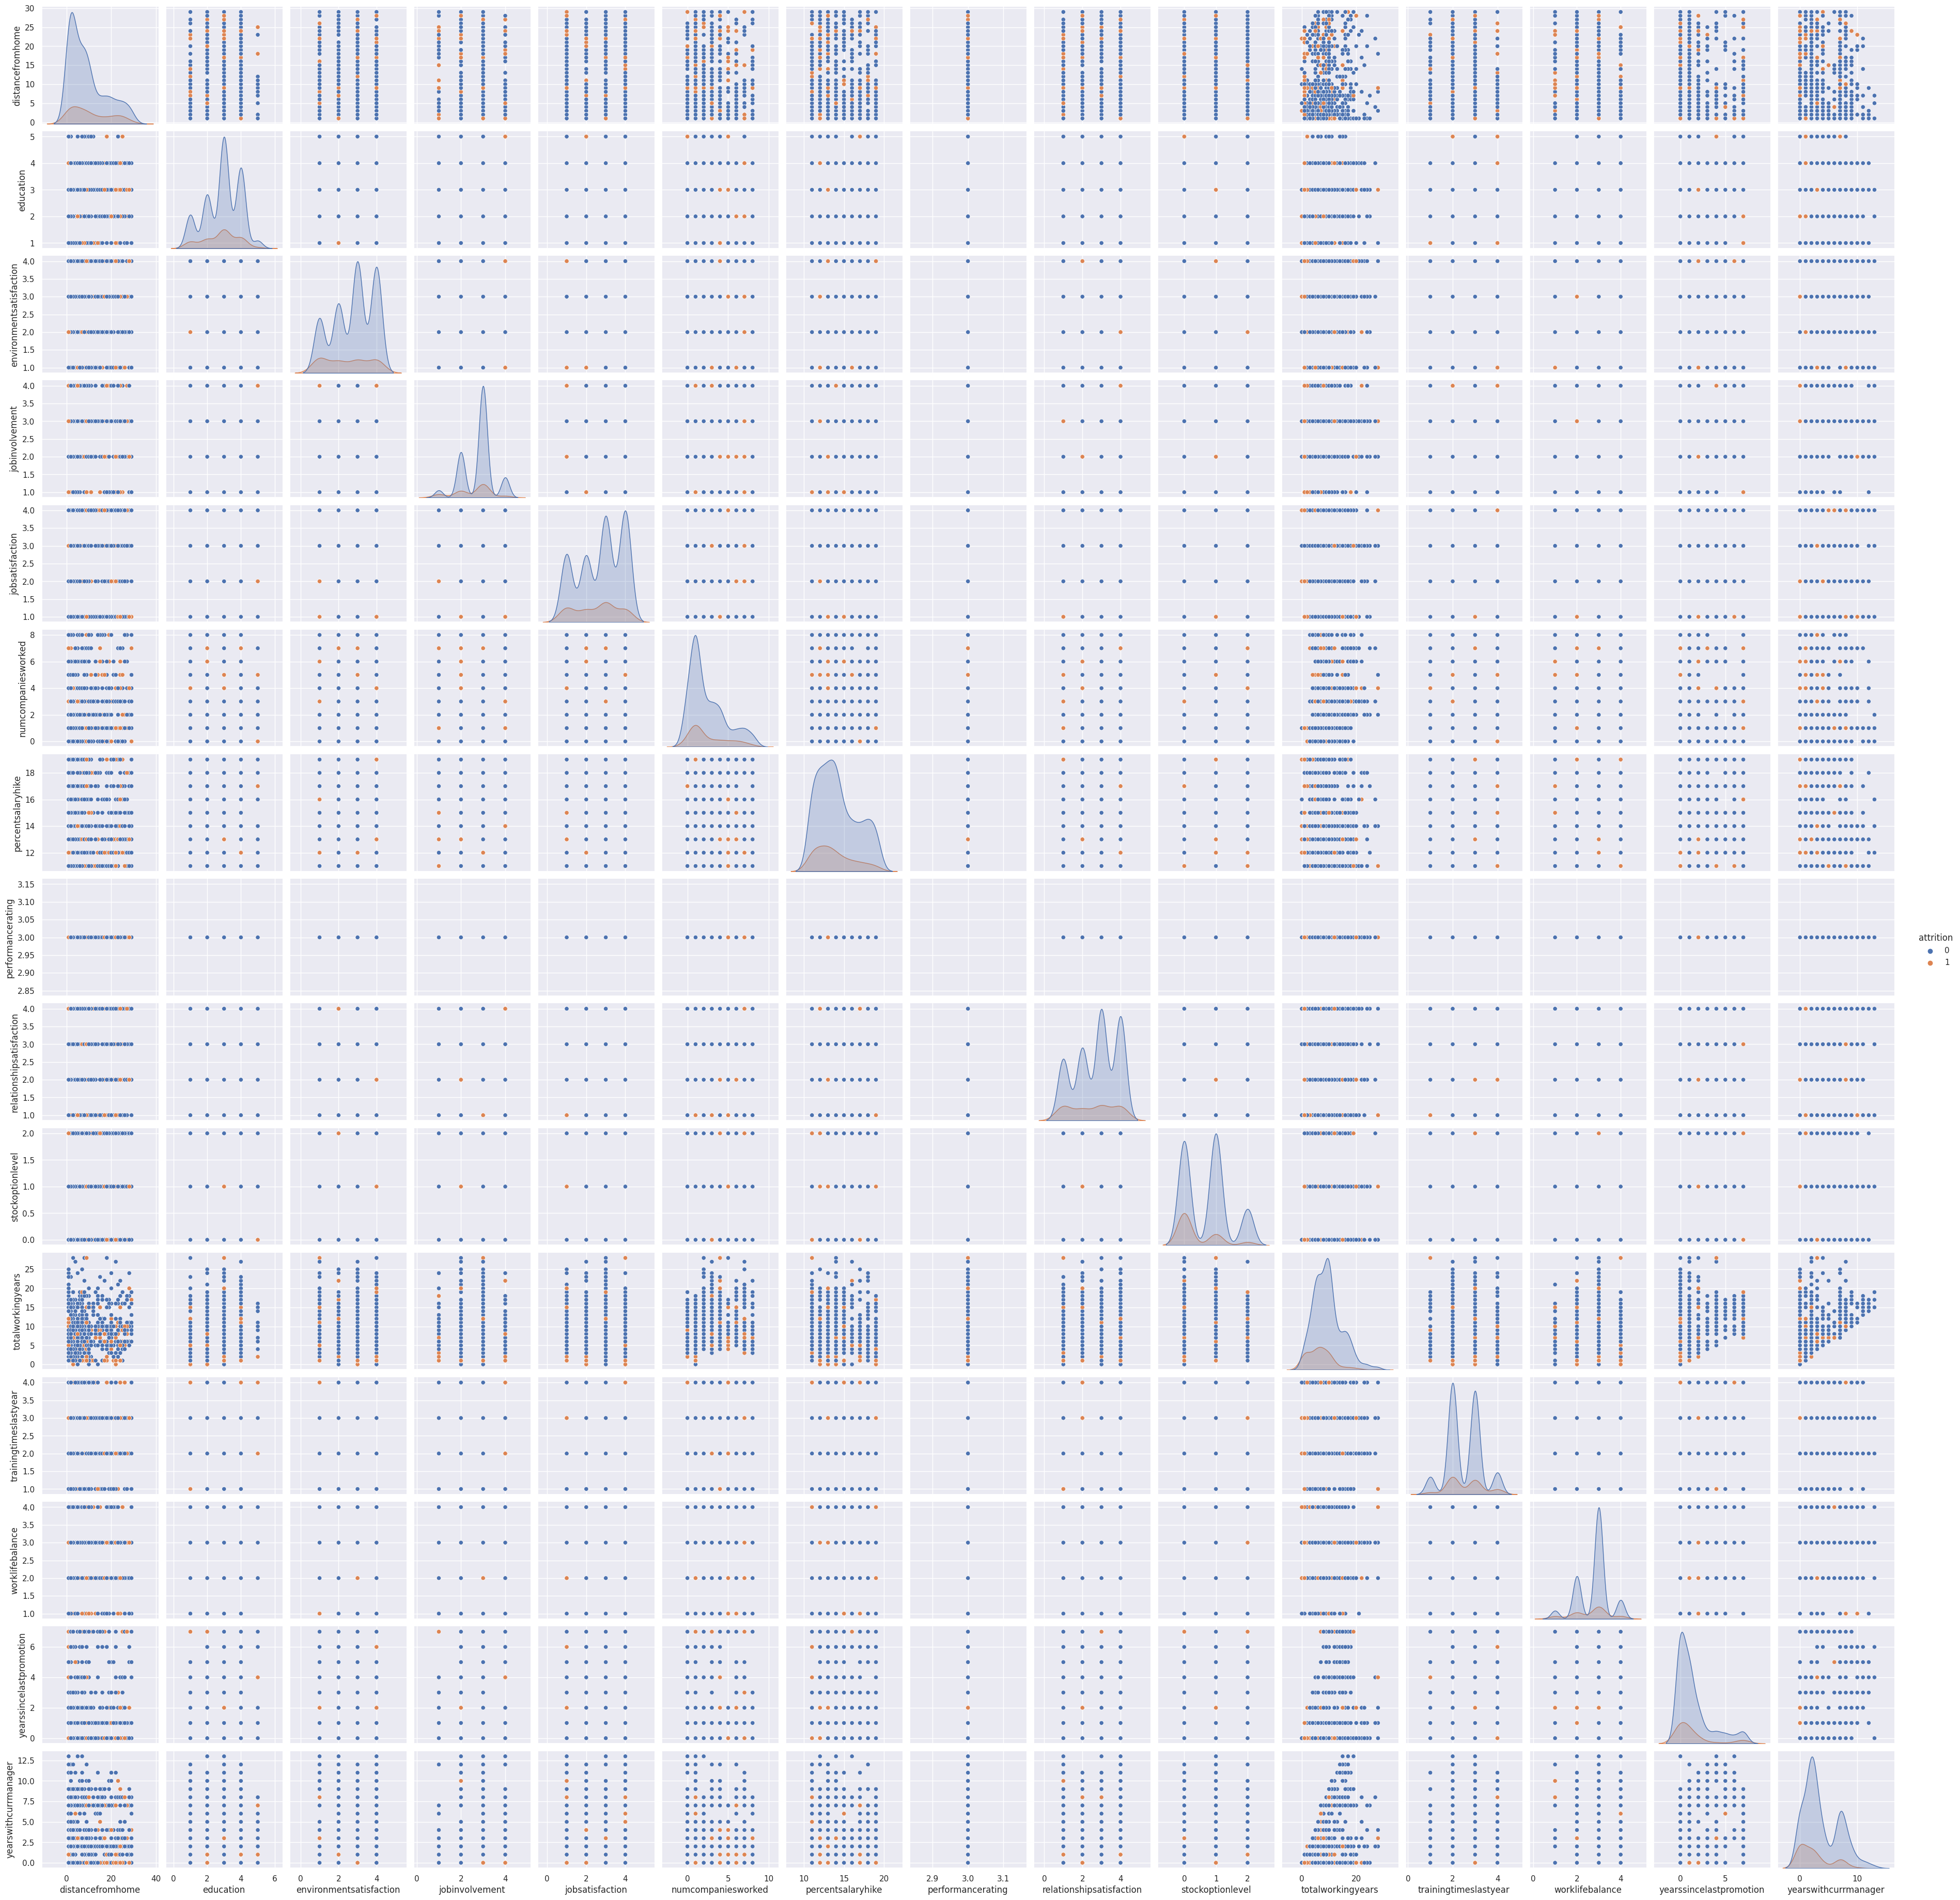

In [ ]:
# Visualize a pairplot with relevant features

sns.pairplot(df_no_outliers, hue = 'attrition')

### Explore Correlation

- Plotting the Heatmap

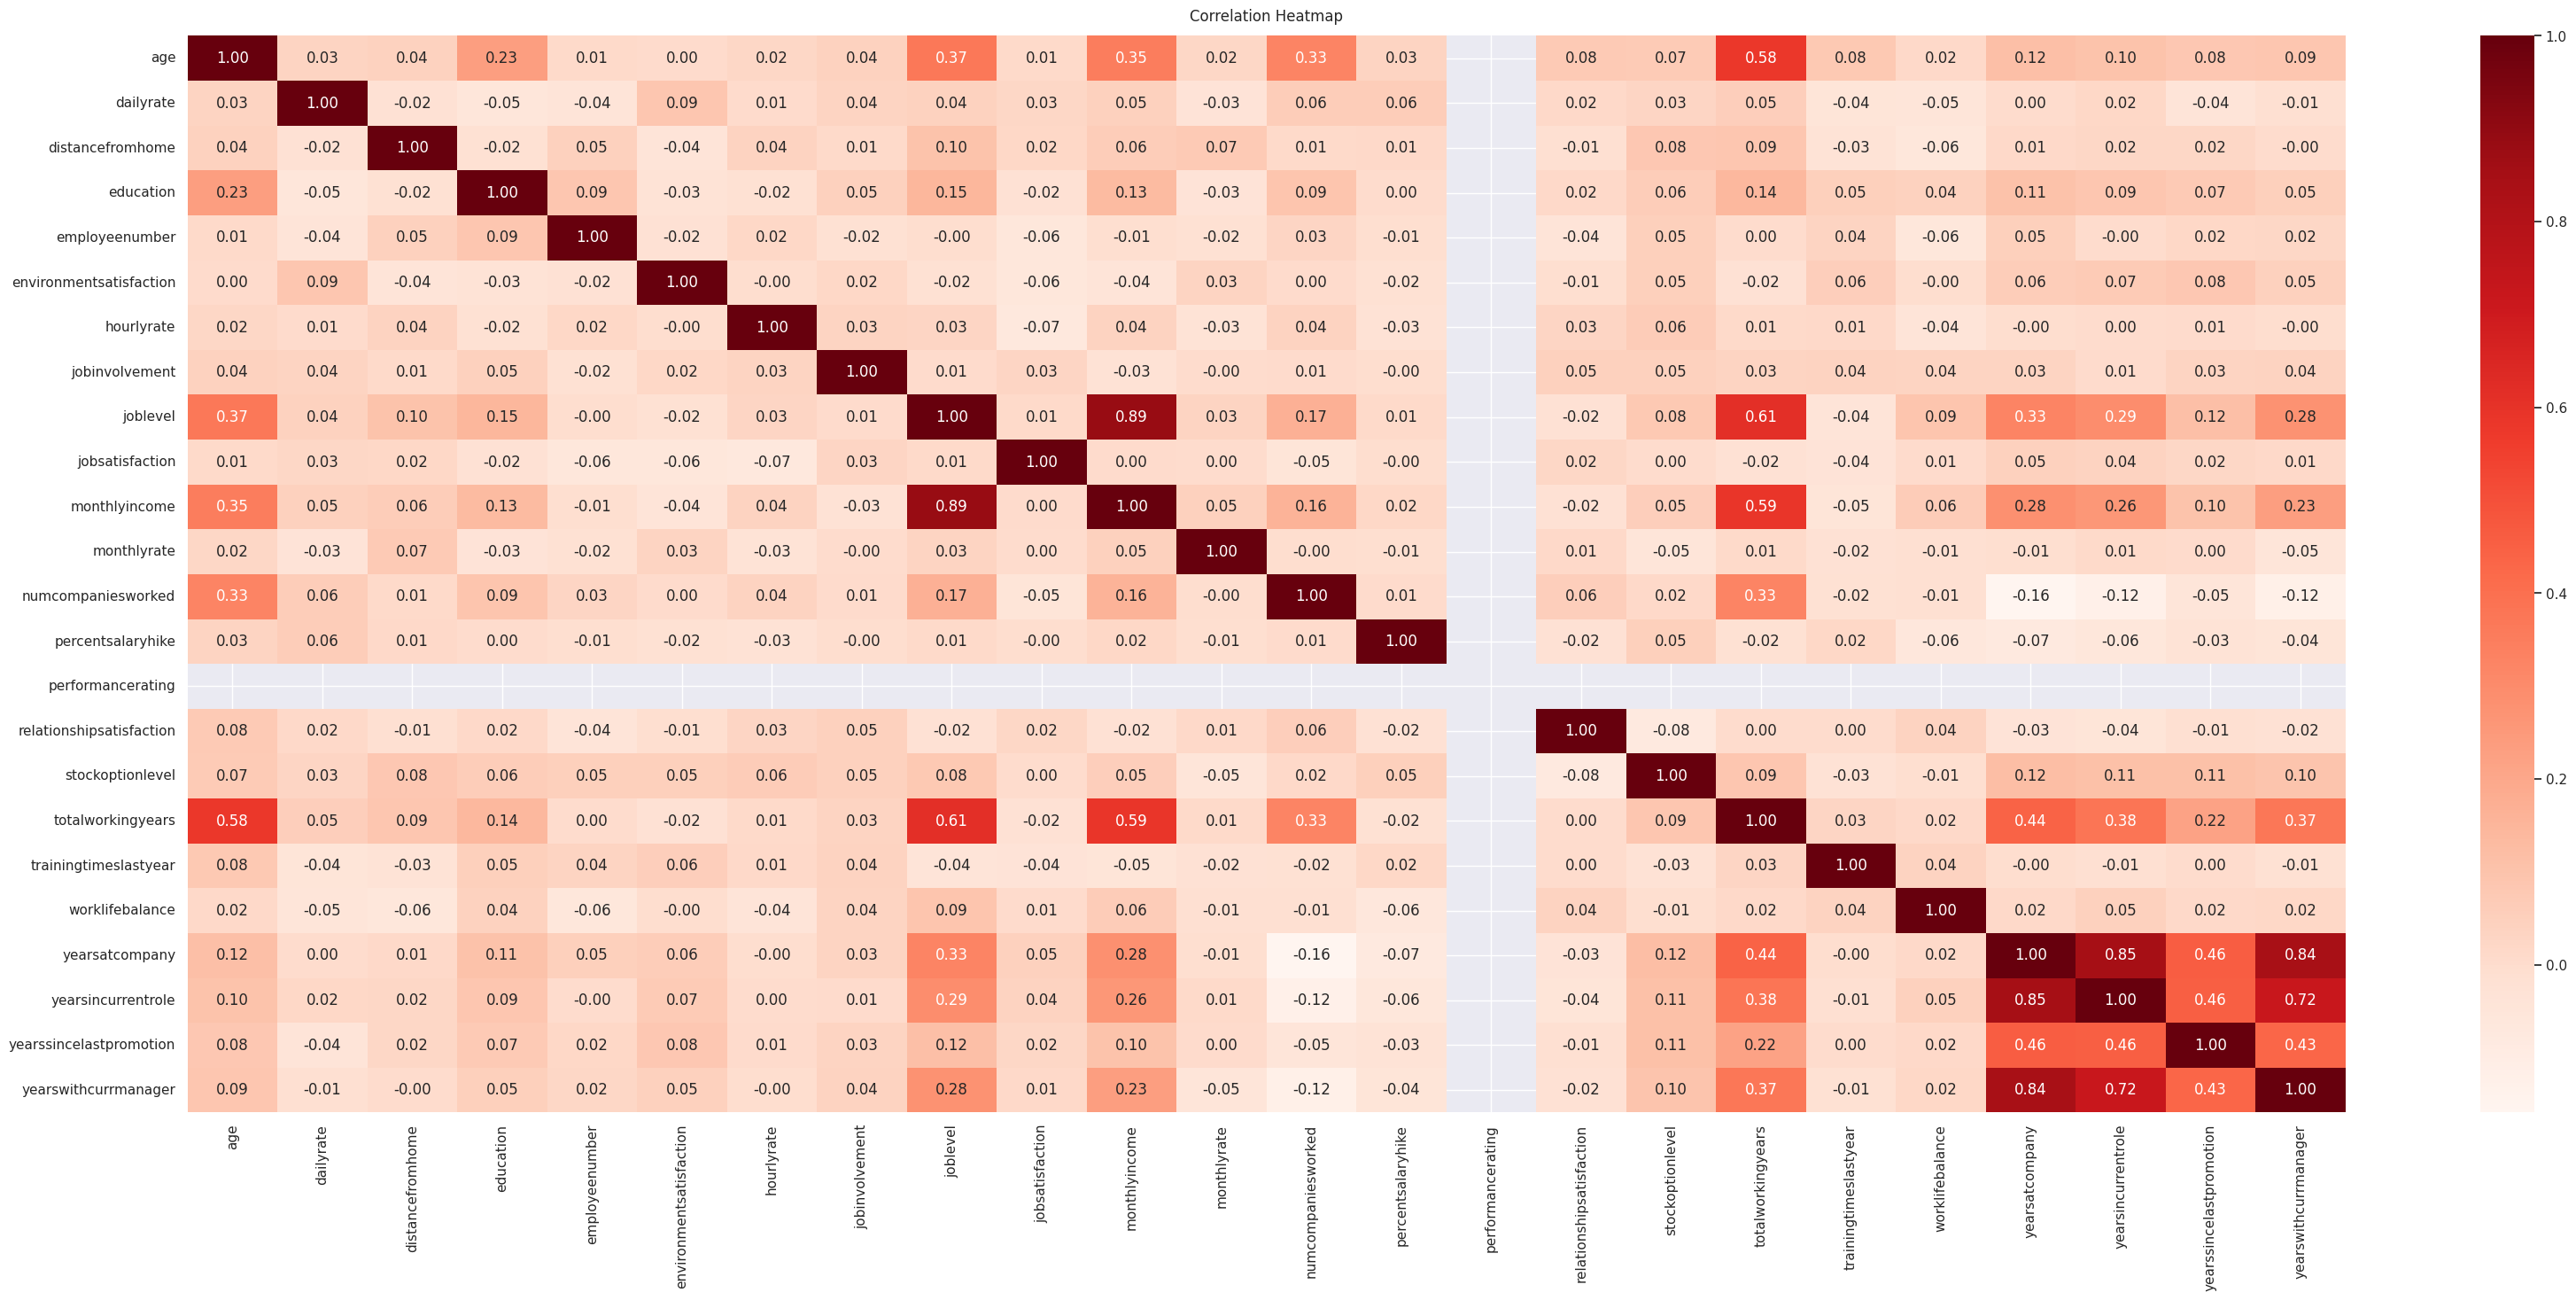

In [ ]:
# Visualize heatmap
# plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df_no_outliers.corr(), cmap='Reds', annot=True, fmt='.2f')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# highly correlated:
# 1. age, joblevel, monthly income, totalworkingyears
# 2. yearsatcurr:role, company, manager
# we can drop all of the above except 1) totalworkingyears, 2)yearswithcurrmanager
df_no_outliers.drop(columns=['age', 'joblevel', 'monthlyincome', 'yearsatcompany', 'yearsincurrentrole'], inplace=True, axis=1)
df_no_outliers.drop(columns=['dailyrate', 'monthlyrate', 'employeenumber', 'hourlyrate'], inplace=True, axis=1)
df_no_outliers.shape

(779, 23)

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
#Change values of feature attrition, where Yes=1 and No=0
df_no_outliers['attrition'] = np.where(df_no_outliers['attrition']=='Yes', 1, 0)

In [ ]:
# Copy the data
df_input_data = df_no_outliers.copy()

In [ ]:
# Target Column
Y = df_input_data['attrition']

In [ ]:
# Feature Space
X = df_input_data.drop(columns='attrition', axis=1)

# Splitting the data for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# list of categorical columns
categorical_features_indices = np.where(X_train.dtypes != np.int64)[0]

### Model Definition

In [ ]:
# Create CatBoost model
catboostModel = CatBoostClassifier(iterations=1000,
                            learning_rate=0.1,
                            depth=6,
                            loss_function='Logloss',
                            eval_metric='AUC',
                            random_seed=42,
                            od_type='Iter',
                            od_wait=20)

In [ ]:
# Model training
catboostModel.fit(X_train, Y_train, cat_features=categorical_features_indices, eval_set=(X_test, Y_test), verbose=100)

0:	test: 0.7833588	best: 0.7833588 (0)	total: 23.8ms	remaining: 23.8s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8534351145
bestIteration = 5

Shrink model to first 6 iterations.


### Model performance

In [ ]:
# Model performance on all sets
Y_pred_catboost = catboostModel.predict(X_test)
Y_pred_proba_catboost = catboostModel.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(Y_test, Y_pred_proba_catboost)

accuracy = accuracy_score(Y_test, Y_pred_catboost)

f1 = f1_score(Y_test, Y_pred_catboost, pos_label=0)

catboost_result = pd.DataFrame({
    'Model' : 'CatBoost',
    'ROC_AUC_SCORE' : roc_auc_score(Y_test, Y_pred_proba_catboost),
    'ACC_SCORE': accuracy_score(Y_test, Y_pred_catboost),
    'F1_SCORE': f1_score(Y_test, Y_pred_catboost, pos_label=0)
}, index=[0])
catboost_result

Model  ROC_AUC_SCORE  ACC_SCORE  F1_SCORE
0  CatBoost       0.853435   0.852564  0.919298

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.


### Data Processing for XGBoost


In [ ]:
# Copy dataframe
df_input_data_xgb = df_no_outliers.copy()

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
xgb_cat_cols = df_input_data_xgb.select_dtypes(include=['object']).columns.tolist()
df_dummy = pd.get_dummies(df_input_data_xgb[xgb_cat_cols], drop_first=True)
df_dummy.head()

businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  \
2                                  0                             1   
3                                  1                             0   
5                                  1                             0   
9                                  0                             1   
11                                 0                             1   

    department_Research & Development  department_Sales  \
2                                   1                 0   
3                                   1                 0   
5                                   1                 0   
9                                   1                 0   
11                                  1                 0   

    educationfield_Life Sciences  educationfield_Marketing  \
2                              0                         0   
3                              1                         0   
5                              1                         0   
9                              0                         0   
11                             1                         0   

    educationfield_Medical  educationfield_Other  \
2                        0                     1   
3                        0                     0   
5                        0                     0   
9                        1                     0   
11                       0                     0   

    educationfield_Technical Degree  gender_Male  jobrole_Human Resources  \
2                                 0            1                        0   
3                                 0            0                        0   
5                                 0            1                        0   
9                                 0            1                        0   
11                                0            0                        0   

    jobrole_Laboratory Technician  jobrole_Manager  \
2                               1                0   
3                               0                0   
5                               1                0   
9                               0                0   
11                              1                0   

    jobrole_Manufacturing Director  jobrole_Research Director  \
2                                0                          0   
3                                0                          0   
5                                0                          0   
9                                0                          0   
11                               0                          0   

    jobrole_Research Scientist  jobrole_Sales Executive  \
2                            0                        0   
3                            1                        0   
5                            0                        0   
9                            0                        0   
11                           0                        0   

    jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  \
2                              0                      0                     1   
3                              0                      1                     0   
5                              0                      0                     1   
9                              0                      1                     0   
11                             0                      0                     1   

    overtime_Yes  
2              1  
3              1  
5              0  
9              0  
11             1

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# drop categorical columns
df_input_data_xgb.drop(columns=xgb_cat_cols, inplace=True)
df_input_data_xgb = pd.concat([df_input_data_xgb, df_dummy], axis = 1)
df_input_data_xgb.head()
# df_input_data_xgb.to_csv('train.csv', index=False,header=True)

attrition  distancefromhome  education  environmentsatisfaction  \
2           1                 2          2                        4   
3           0                 3          4                        4   
5           0                 2          2                        4   
9           0                27          3                        3   
11          0                15          2                        4   

    jobinvolvement  jobsatisfaction  numcompaniesworked  percentsalaryhike  \
2                2                3                   6                 15   
3                3                3                   1                 11   
5                3                4                   0                 13   
9                3                3                   6                 13   
11               2                3                   0                 12   

    performancerating  relationshipsatisfaction  stockoptionlevel  \
2                   3                         2                 0   
3                   3                         3                 0   
5                   3                         3                 0   
9                   3                         2                 2   
11                  3                         4                 0   

    totalworkingyears  trainingtimeslastyear  worklifebalance  \
2                   7                      3                3   
3                   8                      3                3   
5                   8                      2                2   
9                  17                      3                2   
11                 10                      3                3   

    yearssincelastpromotion  yearswithcurrmanager  \
2                         0                     0   
3                         3                     0   
5                         3                     6   
9                         7                     7   
11                        0                     8   

    businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  \
2                                  0                             1   
3                                  1                             0   
5                                  1                             0   
9                                  0                             1   
11                                 0                             1   

    department_Research & Development  department_Sales  \
2                                   1                 0   
3                                   1                 0   
5                                   1                 0   
9                                   1                 0   
11                                  1                 0   

    educationfield_Life Sciences  educationfield_Marketing  \
2                              0                         0   
3                              1                         0   
5                              1                         0   
9                              0                         0   
11                             1                         0   

    educationfield_Medical  educationfield_Other  \
2                        0                     1   
3                        0                     0   
5                        0                     0   
9                        1                     0   
11                       0                     0   

    educationfield_Technical Degree  gender_Male  jobrole_Human Resources  \
2                                 0            1                        0   
3                                 0            0                        0   
5                                 0            1                        0   
9                                 0            1                        0   
11                                0            0                        0   

    jobrole_Laboratory Technician  jobrole_Manager  \
2   

In [ ]:
# Feature Space
Y = df_input_data_xgb['attrition']

# Feature Space
# YOUR CODE HERE
X = df_input_data_xgb.drop(columns='attrition', axis=1)

# Splitting the data for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

counter = Counter(Y_train)
# estimate scale_pos_weight value
scale_pos_weight = counter[0] / counter[1]

### Model Definition

In [ ]:
# Create XGBoost classifier model
xgbModel = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, scale_pos_weight=scale_pos_weight)

In [ ]:
# Model training
xgbModel.fit(X_train, Y_train)

ValueError: ignored

### Model Performance

In [ ]:
# Model performance on all sets
Y_pred_xgboost = xgbModel.predict(X_test)
# print(Y_pred)

xgboost_result = pd.DataFrame({
    'Model': 'XGBoost',
    'ROC_AUC_SCORE': roc_auc_score(Y_test, Y_pred_xgboost),
    'ACC_SCORE': accuracy_score(Y_test, Y_pred_xgboost),
    'F1_SCORE': f1_score(Y_test, Y_pred_xgboost)
}, index=[0])
xgboost_result

Model  ROC_AUC_SCORE  ACC_SCORE  F1_SCORE
0  XGBoost       0.741832   0.865385  0.571429

In [ ]:
# Create a dataframe for computed metrics for different models
catboost_result.append(xgboost_result, ignore_index=True)

Model  ROC_AUC_SCORE  ACC_SCORE  F1_SCORE
0  CatBoost       0.853435   0.852564  0.919298
1   XGBoost       0.741832   0.865385  0.571429

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/